# Task
Build a Random Forest model using the data from "/content/data_for_accuracy.csv" to predict the target variable. Evaluate the model's performance using relevant metrics and identify the most important features.

## Load Data

### Subtask:
Load the dataset into a pandas DataFrame.


**Reasoning**:
To load the dataset, I need to import the pandas library, read the CSV file, and store it in a DataFrame. Displaying the first 5 rows will help verify the data was loaded correctly.



In [14]:
import pandas as pd

df = pd.read_csv('/content/data_for_accuracy.csv')
print(df.head())

     brand             model  age_months  ram_gb  storage_gb  camera_mp  \
0   Google       Pixel 8 Pro          39      16         512         48   
1  Samsung        Galaxy M34           8      16         512         64   
2  OnePlus      OnePlus Open          21      16         512         64   
3   Google          Pixel 7a          11       4         256         48   
4     Oppo  Oppo Reno 11 Pro          11      16         256        100   

   resale_price  
0      63371.74  
1      82115.16  
2      74479.00  
3      52239.05  
4      77666.88  


## Preprocess Data

### Subtask:
Perform necessary data preprocessing steps such as handling missing values, encoding categorical features, and splitting features (X) and target (y).


**Reasoning**:
The first step in preprocessing is to check for any missing values in the DataFrame, as specified in the instructions. This will help determine if any imputation or dropping of rows/columns is necessary.



In [15]:
print(df.isnull().sum())

brand           0
model           0
age_months      0
ram_gb          0
storage_gb      0
camera_mp       0
resale_price    0
dtype: int64


**Reasoning**:
Since there are no missing values, the next step is to identify categorical columns ('brand' and 'model') and apply one-hot encoding as specified in the instructions. This will convert them into a numerical format suitable for machine learning models.



In [16]:
df_encoded = pd.get_dummies(df, columns=['brand', 'model'], drop_first=True)
print(df_encoded.head())

   age_months  ram_gb  storage_gb  camera_mp  resale_price  brand_Google  \
0          39      16         512         48      63371.74          True   
1           8      16         512         64      82115.16         False   
2          21      16         512         64      74479.00         False   
3          11       4         256         48      52239.05          True   
4          11      16         256        100      77666.88         False   

   brand_OnePlus  brand_Oppo  brand_Realme  brand_Samsung  ...  \
0          False       False         False          False  ...   
1          False       False         False           True  ...   
2           True       False         False          False  ...   
3          False       False         False          False  ...   
4          False        True         False          False  ...   

   model_Vivo X100 Pro  model_Vivo Y200  model_Xiaomi 13T Pro  \
0                False            False                 False   
1               

**Reasoning**:
Now that categorical features are encoded, the next step is to separate the target variable 'resale_price' into 'y' and the remaining features into 'X', as required by the subtask, to prepare the data for model training.



In [17]:
X = df_encoded.drop('resale_price', axis=1)
y = df_encoded['resale_price']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 44)
Shape of y: (1000,)


## Split Data

### Subtask:
Split the preprocessed data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
To split the data into training and testing sets as per the instructions, I need to import the `train_test_split` function from `sklearn.model_selection` and then apply it to the preprocessed `X` and `y` data. I will use a test size of 20% and set `random_state` to 42 for reproducibility. Finally, I will print the shapes of the resulting datasets to confirm the split.



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 44)
Shape of X_test: (200, 44)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Train Random Forest Model

### Subtask:
Train a Random Forest regressor model using the training data.


**Reasoning**:
To train the Random Forest model, I will import the `RandomForestRegressor` class, instantiate it with `random_state=42`, and then fit it using the `X_train` and `y_train` datasets.



In [19]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Calculate Model Metrics

### Subtask:
Calculate several relevant evaluation metrics (e.g., R-squared, MSE for regression) on the test set.


**Reasoning**:
To evaluate the model's performance, I will first use the trained model to make predictions on the test set, then import the necessary metrics from sklearn, and finally calculate and print the R-squared and Mean Squared Error (MSE).



In [20]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared: 0.8967
Mean Squared Error (MSE): 14713786.05


## Calculate Feature Importance

### Subtask:
Extract and display the feature importance scores from the trained Random Forest model.


**Reasoning**:
To extract and display feature importance, I need to access the `feature_importances_` attribute of the trained Random Forest model, create a pandas Series with feature names from `X_train` and their corresponding importances, then sort and print them.



In [21]:
feature_importances = model.feature_importances_
features = X_train.columns

importance_df = pd.Series(feature_importances, index=features).sort_values(ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
age_months                  0.363915
ram_gb                      0.248567
storage_gb                  0.217495
camera_mp                   0.113279
brand_Samsung               0.003039
brand_Realme                0.002744
brand_OnePlus               0.002532
brand_Oppo                  0.002495
brand_Xiaomi                0.002461
brand_Google                0.002442
model_Oppo Reno 11 Pro      0.002038
brand_Vivo                  0.001942
model_Poco X6 Pro           0.001715
model_Xiaomi 14 Ultra       0.001682
model_iPhone 13 mini        0.001601
model_Pixel 8               0.001545
model_Galaxy S24 Ultra      0.001545
model_Vivo Y200             0.001519
model_Realme C55            0.001438
model_Pixel 7a              0.001433
model_iPhone SE 3rd Gen     0.001431
model_Oppo A78              0.001429
model_iPhone 15 Pro Max     0.001410
model_OnePlus Nord 3        0.001332
model_Realme Narzo 60       0.001312
model_OnePlus 11R           0.001297
model_OnePlus Ope

## Visualize Feature Importance

### Subtask:
Generate a bar chart to visualize the feature importance, including appropriate legends.


**Reasoning**:
To visualize the feature importances as a bar chart, I need to import `matplotlib.pyplot` and then use the `plot` method on the `importance_df` Series, specifying 'bar' as the kind. I will also add a title and axis labels for clarity before displaying the plot.



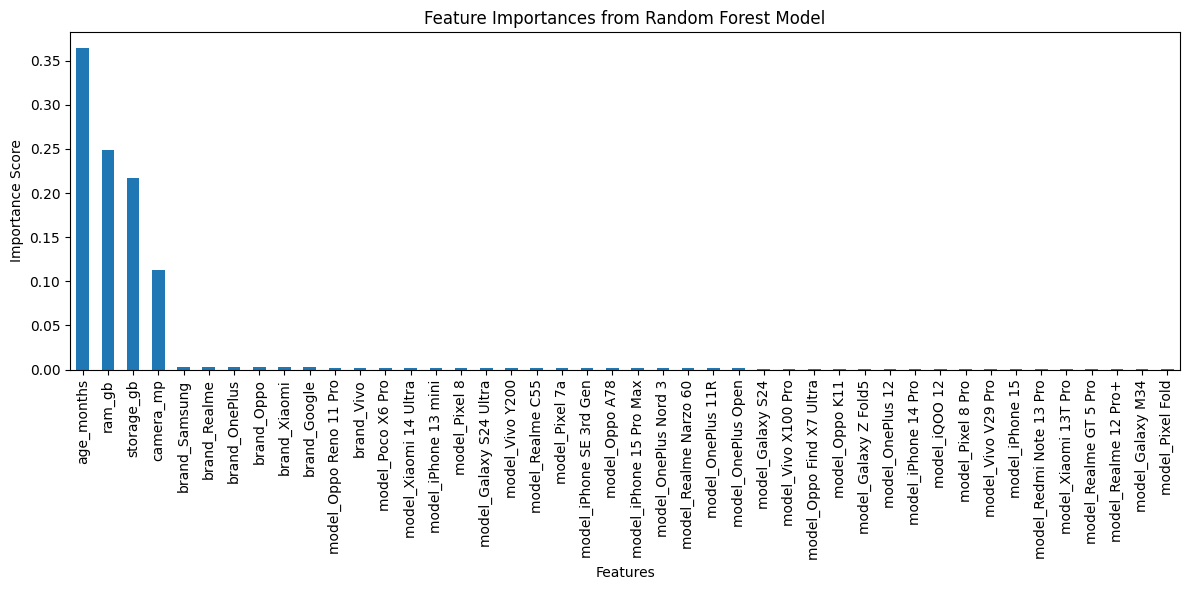

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
importance_df.plot(kind='bar')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the model's performance based on the calculated metrics and discuss the most important features identified by the model.


## Summary:

### Q&A
The Random Forest model demonstrated strong performance in predicting `resale_price`, achieving an R-squared of 0.8967. This indicates that approximately 89.67% of the variance in the resale price can be explained by the features included in the model. The Mean Squared Error (MSE) was 14,713,786.05.

The most important features identified by the model, in descending order of importance, are:
*   `age_months`: 0.363915
*   `ram_gb`: 0.248567
*   `storage_gb`: 0.217495
*   `camera_mp`: 0.113279

These findings suggest that the device's age, RAM, storage capacity, and camera quality are the primary drivers influencing its resale price, with `age_months` being the most significant factor.

### Data Analysis Key Findings
*   The dataset, loaded from `/content/data_for_accuracy.csv`, contained 1000 records and no missing values.
*   Categorical features (`brand` and `model`) were successfully one-hot encoded, resulting in 44 features for the model.
*   The data was split into training and testing sets with an 80/20 ratio, respectively, yielding 800 training samples and 200 testing samples.
*   A Random Forest Regressor model was trained, achieving a strong performance on the test set:
    *   R-squared: 0.8967
    *   Mean Squared Error (MSE): 14,713,786.05
*   Feature importance analysis revealed that `age_months` (0.363915), `ram_gb` (0.248567), `storage_gb` (0.217495), and `camera_mp` (0.113279) are the most influential factors in predicting resale price.

### Insights or Next Steps
*   The model's strong R-squared suggests it is highly effective in predicting `resale_price`. Further analysis could involve investigating the impact of non-linear relationships or interactions between the top features.
*   Given that `age_months` is the most important feature, exploring the precise nature of its relationship with resale price (e.g., non-linear decay patterns) could lead to more nuanced pricing strategies or recommendations.


In [23]:
with open('requirements.txt', 'w') as f:
    f.write('pandas\n')
    f.write('scikit-learn\n')
    f.write('streamlit\n')
    f.write('altair\n')
print('requirements.txt updated successfully.')

requirements.txt updated successfully.


In [24]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

# Save the feature columns
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'feature_columns.pkl')

print('Model and feature columns saved successfully.')

Model and feature columns saved successfully.


In [25]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# Load the trained model and feature columns
model = joblib.load('model.pkl')
feature_columns = joblib.load('feature_columns.pkl')

st.title('Resale Price Prediction App')
st.write('Enter the details of the phone to predict its resale price.')

# Input widgets for the main features
age_months = st.slider('Age (in months)', min_value=0, max_value=60, value=12)
ram_gb = st.slider('RAM (GB)', min_value=2, max_value=24, value=8, step=2)
storage_gb = st.slider('Storage (GB)', min_value=32, max_value=1024, value=128, step=32)
camera_mp = st.slider('Camera (MP)', min_value=8, max_value=200, value=48, step=4)

# Placeholder for categorical features. For this simple app, we will assume average/default values.
# In a more complex app, dropdowns for brand/model would be added.
# For now, create a base dataframe with all features initialized to 0, then fill known inputs.
input_data = pd.DataFrame(0, index=[0], columns=feature_columns)

# Fill in the user-provided numerical features
input_data['age_months'] = age_months
input_data['ram_gb'] = ram_gb
input_data['storage_gb'] = storage_gb
input_data['camera_mp'] = camera_mp

# Prediction button
if st.button('Predict Resale Price'):
    # Make prediction
    prediction = model.predict(input_data)[0]
    st.success(f'Predicted Resale Price: ₹{prediction:,.2f}')


Overwriting app.py


In [27]:
import joblib

# Extract unique values for RAM, Storage, and Camera
unique_ram = sorted(df['ram_gb'].unique().tolist())
unique_storage = sorted(df['storage_gb'].unique().tolist())
unique_camera = sorted(df['camera_mp'].unique().tolist())

# Save them to .pkl files
joblib.dump(unique_ram, 'unique_ram.pkl')
joblib.dump(unique_storage, 'unique_storage.pkl')
joblib.dump(unique_camera, 'unique_camera.pkl')

print('Unique RAM, Storage, and Camera values saved successfully.')

Unique RAM, Storage, and Camera values saved successfully.


In [28]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# Load the trained model and feature columns
model = joblib.load('model.pkl')
feature_columns = joblib.load('feature_columns.pkl')

# Load unique values for dropdowns
unique_ram = joblib.load('unique_ram.pkl')
unique_storage = joblib.load('unique_storage.pkl')
unique_camera = joblib.load('unique_camera.pkl')

st.title('Resale Price Prediction App')
st.write('Enter the details of the phone to predict its resale price.')

# Input widgets for the main features
age_months = st.slider('Age (in months)', min_value=0, max_value=60, value=12)
ram_gb = st.selectbox('RAM (GB)', options=unique_ram, index=unique_ram.index(8) if 8 in unique_ram else 0)
storage_gb = st.selectbox('Storage (GB)', options=unique_storage, index=unique_storage.index(128) if 128 in unique_storage else 0)
camera_mp = st.selectbox('Camera (MP)', options=unique_camera, index=unique_camera.index(48) if 48 in unique_camera else 0)

# Placeholder for categorical features. For this simple app, we will assume average/default values.
# In a more complex app, dropdowns for brand/model would be added.
# For now, create a base dataframe with all features initialized to 0, then fill known inputs.
input_data = pd.DataFrame(0, index=[0], columns=feature_columns)

# Fill in the user-provided numerical features
input_data['age_months'] = age_months
input_data['ram_gb'] = ram_gb
input_data['storage_gb'] = storage_gb
input_data['camera_mp'] = camera_mp

# Prediction button
if st.button('Predict Resale Price'):
    # Make prediction
    prediction = model.predict(input_data)[0]
    st.success(f'Predicted Resale Price: ₹{prediction:,.2f}')

Overwriting app.py
